# Training and visualizing Decision Tree

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz              #for graph presentation
from sklearn import tree     #for text presentation
import matplotlib.pyplot as plt
import numpy as np

In [3]:
iris = load_iris()
x = iris.data[:,2:]
y = iris.target
print(iris.feature_names[2:])
print(iris.target_names)


['petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [90]:
tree_clf = DecisionTreeClassifier(random_state = 1234,max_depth=2)
tree_clf.fit(x,y)
print('probability:',tree_clf.predict_proba([[5,1.5]]))  #showing the probability to belong classes.
print('predict',tree_clf.predict([[5,1.5]]))

probability: [[0.         0.90740741 0.09259259]]
predict [1]


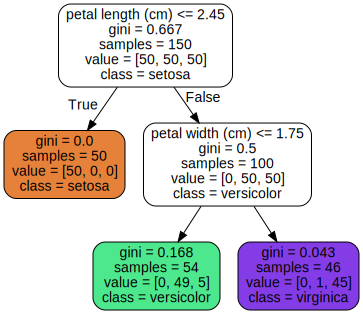

In [91]:
dot_data = export_graphviz(tree_clf, out_file= None, feature_names= iris.feature_names[2:], filled = True, #filled: add color
                           class_names= iris.target_names, rounded = True)
graph = graphviz.Source(dot_data,format = 'png')
graph

In [86]:
text_presentation = tree.export_text(tree_clf)
print(text_presentation)

|--- feature_1 <= 0.80
|   |--- class: 0
|--- feature_1 >  0.80
|   |--- feature_1 <= 1.75
|   |   |--- class: 1
|   |--- feature_1 >  1.75
|   |   |--- class: 2



[Text(223.2, 453.0, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(111.6, 271.8, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(334.79999999999995, 271.8, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(223.2, 90.59999999999997, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(446.4, 90.59999999999997, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

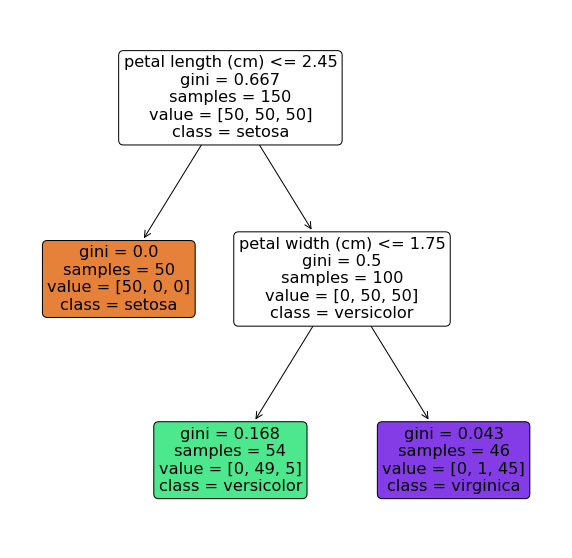

In [92]:
plt.figure(figsize = (10,10))
tree.plot_tree(tree_clf, feature_names= iris.feature_names[2:], filled = True, #filled: add color
                           class_names= iris.target_names, rounded = True)

In [25]:
from dtreeviz.trees import dtreeviz

In [27]:
dtreeviz(tree_clf,x,y, target_name= 'Target', feature_names= iris.feature_names[2:], class_names= list(iris.target_names))

ExecutableNotFound: failed to execute ['dot', '-Tsvg', '-o', 'C:\\Users\\fatem\\AppData\\Local\\Temp\\DTreeViz_11324.svg', 'C:/Users/fatem/AppData/Local/Temp\\DTreeViz_11324'], make sure the Graphviz executables are on your systems' PATH

In [26]:
fifth method for visualizing

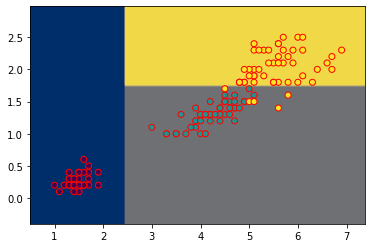

In [93]:
x0_min, x0_max = min(x[:,0])- 0.5, max(x[:,0]) + 0.5
x1_min, x1_max = min(x[:,1])- 0.5, max(x[:,1]) + 0.5
xx, yy = np.meshgrid(np.arange(x0_min, x0_max ,0.02),np.arange(x1_min, x1_max ,0.02))
z = tree_clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = z.reshape((xx.shape))
plt.contourf(xx,yy,Z ,cmap = 'cividis') 
#cmap{tab10,binary,gray,plt.cm.gray,plt.get_cmap('jet'),magma,viridis', 'plasma', 'inferno', 'cividis'} 
# colors = ('c','r','b','m','g'),intensity = 0.5)
plt.scatter(x[:,0],x[:,1],c = y, edgecolors='r',marker = 'o')

In [94]:
from sklearn.datasets import make_moons
df = make_moons()
x = df[0]
y = df[1]

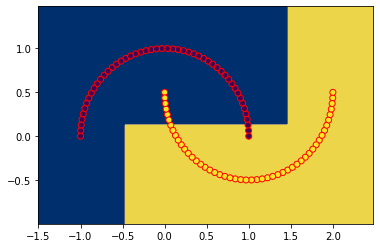

In [99]:
tree_clf = DecisionTreeClassifier(random_state = 1234,max_depth=3)
tree_clf.fit(x,y)
tree_clf.predict(x)
x0_min, x0_max = min(x[:,0])- 0.5, max(x[:,0]) + 0.5
x1_min, x1_max = min(x[:,1])- 0.5, max(x[:,1]) + 0.5
xx, yy = np.meshgrid(np.arange(x0_min, x0_max ,0.02),np.arange(x1_min, x1_max ,0.02))
z = tree_clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = z.reshape((xx.shape))
plt.contourf(xx,yy,Z ,cmap = 'cividis') 
#cmap{tab10,binary,gray,plt.cm.gray,plt.get_cmap('jet'),magma,viridis', 'plasma', 'inferno', 'cividis'} 
# colors = ('c','r','b','m','g'),intensity = 0.5)
plt.scatter(x[:,0],x[:,1],c = y, edgecolors='r',marker = 'o')